### Task 1
In your data set, select a subset of 3-6 features related to the same aspect and explain your choice (may be the same subset that was used for k-means clustering)

Let us load dataset.
We will choose such features, that our clusters will interprete genres of songs. Let it be danceability, energy, loudness and tempo and 

In [156]:
import numpy as np
import pandas as pd

spotify_data = pd.read_csv('dataset-of-90s.csv')
incols = ["danceability","energy","loudness","tempo"] 
spotify_data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


### Task 2
1. Standardize the selected subset;

In [157]:
# standartize data
df_not_std = spotify_data[incols].copy().head(2000)
df_z_std = spotify_data[incols].copy().head(2000)
df_rng_std = spotify_data[incols].copy().head(2000)
df_rnk_std = spotify_data[incols].copy().head(2000)
for col in incols:
    df_z_std[col] = (spotify_data[col] - spotify_data[col].mean())/spotify_data[col].std()
    df_rng_std[col] = (spotify_data[col] - spotify_data[col].mean())/np.ptp(spotify_data[col])
    df_rnk_std[col] = (spotify_data[col] - spotify_data[col].min())/np.ptp(spotify_data[col])

In [158]:
df_not_std.head()

,danceability,energy,loudness,tempo
0,0.527,0.316,-15.769,116.211
1,0.738,0.541,-5.485,134.187
2,0.736,0.419,-10.662,93.982
3,0.565,0.594,-13.086,114.219
4,0.513,0.760,-10.077,153.166


In [159]:
df_z_std.head()

,danceability,energy,loudness,tempo
0,-0.221170,-1.135046,-1.081440,-0.089165
1,0.948628,-0.242859,0.928274,0.520408
2,0.937540,-0.726623,-0.083423,-0.842959
3,-0.010495,-0.032699,-0.557125,-0.156714
4,-0.298787,0.625537,0.030898,1.163994


2. compute its data scatter and SVD; 

In [160]:
def svd(x):
    z, mu, c = np.linalg.svd(x)  
    z = -z
    c = -c 
    mu_arg_max = np.argmax(mu)
    
    n_contributions = np.power(mu, 2)
    ds = np.sum(np.power(x, 2))  # Data Scatter

    # Determine contributions of all the principal components to the data scatter 
    p_contributions = np.divide(n_contributions, ds)
    return z, mu, c, ds, n_contributions, p_contributions, mu_arg_max

In [161]:
# Singular decomposition on original data 
z_x, mu_x, c_x, ds_x, n_contributions_x, p_contributions_x, mu_argmax_x = \
svd(x=df_not_std)

In [162]:
# Singular decomposition on Z-Scored standardized data
z_x_zscore, mu_x_zscore, c_x_zscore, ds_x_zscore,\
n_contributions_x_zscore, p_contributions_x_zscore, mu_argmax_x_zscore  = \
svd(x=df_z_std)

In [163]:
# Singular decomposition on Range standardized data
z_x_range, mu_x_range, c_x_range, ds_x_range,\
n_contributions_x_range, p_contributions_x_range,mu_argmax_x_range = \
svd(x=df_rng_std)

In [164]:
# Singular decomposition on Rank standardized data
z_x_rank, mu_x_rank, c_x_rank, ds_x_rank,\
n_contributions_x_rank, p_contributions_x_rank, mu_argmax_x_rank = \
svd(x=df_rnk_std)

3. determine contributions of all the principal components to the data scatter, naturally and per cent.

In [ ]:
print('Natural contributions of\n\
Original data: {}\n\
Ranked std data: {}\n\
Ranged std data: {}\n\
Z-Scored std data: {}'.format(n_contributions_x,
                                 n_contributions_x_rank,
                                 n_contributions_x_range,
                                 n_contributions_x_zscore))

In [ ]:
print('Percent contributions of\n\
Original data:\n{}\n\
Ranked std data:\n{}\n\
Ranged std data:\n{}\n\
Z-Scored std data:\n{}'.format(100*p_contributions_x,
                                 100*p_contributions_x_rank,
                                 100*p_contributions_x_range,
                                 100*p_contributions_x_zscore))

In [ ]:
print('loadings of 1st component\n\
Original data:\n{}\n\
Ranked std data:\n{}\n\
Ranged std data:\n{}\n\
Z-Scored std data:\n{}'.format(c_x[mu_argmax_x, :],
                                 c_x_rank[mu_argmax_x_rank, :],
                                 c_x_range[mu_argmax_x_range, :],
                                 c_x_zscore[mu_argmax_x_zscore, :]))

### Task 3
Compute and interpret a hidden ranking factor behind the selected features. The factor should be expressed in a 0-100 rank scale (as well as the features – ranking normalization).

In [ ]:
def part_3(x, z, c, mu, argmax):    
    z1 = z[:, argmax]  # hiden score
    c1 = c[argmax, :]  # loading
    mu1 = mu[argmax] 
    print("c1: ", c1)
    alpha = 1/np.sum(c1)
    loading = c1*alpha  
    print("Loading: ", loading)
    ranking_factors = 100*x@(loading)  # ranking factors
    arg_top5 = np.argsort(ranking_factors)[::-1][:5]
    top_5 = np.sort(ranking_factors,)[::-1][:5]
    
    print("Top5 songs: ", top_5)
    return loading, ranking_factors, arg_top5

In [ ]:
_, _, arg_top5 =\
part_3(x=df_rnk_std, z=z_x_rank, c=c_x_rank, mu=mu_x_rank, argmax=mu_argmax_x_rank)

In [ ]:
for i in arg_top5:
    print(spotify_data.loc[i,['track','artist']])

In [ ]:
# Rank standardized :
_, _, arg_top5 =\
part_3(x=df_z_std, z=z_x_zscore, c=c_x_zscore, mu=mu_x_zscore, argmax=mu_argmax_x_rank)

In [ ]:
for i in arg_top5:
    print(spotify_data.loc[i,['track','artist']])

### Task 4
Visualize the data using two first principal components at the standardization with two versions of normalization: 
- (a) range normalization 
- (b) z-scoring.

At these visualizations, use a distinct shape/color for points representing a pre-specified by your group of objects. 

In [ ]:

print(df_not_std.to_numpy()[:, -1])
subset = np.where(df_not_std.to_numpy()[:, -1] >= 200.)[0] 
print(subset)

In [ ]:
import matplotlib.pyplot as plt

z_z0 = z_x_zscore[:, 0]*np.sqrt(mu_x_zscore[0])
z_z1 = z_x_zscore[:, 1]*np.sqrt(mu_x_zscore[1])

z_r0 = z_x_range[:, 0]*np.sqrt(mu_x_range[0])
z_r1 = z_x_range[:, 1]*np.sqrt(mu_x_range[1])
fig = plt.figure(figsize=(8.5, 9.5))

ax = fig.add_subplot(121)
ax.scatter(z_z0, z_z1)
ax.scatter(z_z0[subset], z_z1[subset], c='r',)
plt.title("PCA of Z-scoring standardized data")

ax = fig.add_subplot(122)
ax.scatter(z_r0, z_r1)
ax.scatter(z_r0[subset], z_r1[subset], c='r',)

plt.title("PCA of Range standardatized data")
plt.show()

In [ ]:
# Loadings:
c_x_zscore[:3, :]

In [ ]:
def conventional_pca(X, standardized=False):    
    # Let us name x as original data set, 
    # restricted at selected subset of features, i.e. x_selected.
    if standardized is False:
        mean_x = np.mean(X, axis=0)
        Y = np.subtract(X, mean_x)  # centered version
        B = (Y.T@Y)/Y.shape[0]  # covariance matrix of Y
        L, C = np.linalg.eig(B)  # Eigenvalues 
        sorted_idx = np.argsort(L)[::-1]  # descending order
        la1 = L[sorted_idx[0]]
        c1 = C[:, sorted_idx[0]]  # unlike np.linalg.svd now we should consider the column
        pc1 = np.divide(Y@c1, np.sqrt(Y.shape[0]*la1))  # 1st principle component    
        B_dot = B - la1*np.multiply(c1, c1.T)  # Residual of Cov.
        L_, C_ = np.linalg.eig(B_dot)
        argmax_ = np.argmax(L_)
        la2 = L_[argmax_]
        c2 = C_[:, argmax_]
        pc2 = np.divide(Y@c2, np.sqrt(Y.shape[0]*la2))  # 2nd principle component 
    else:
        Y = X
        B = (Y.T@Y)/Y.shape[0]  # covariance matrix of Y
        L, C = np.linalg.eig(B)
        sorted_idx = np.argsort(L)[::-1]  # descending order
        la1 = L[sorted_idx[0]]
        c1 = C[:, sorted_idx[0]]  # unlike np.linalg.svd now we should consider the column
        pc1 = np.divide(Y@c1, np.sqrt(Y.shape[0]*la1))  # 1st principle component    
        la2 = L[sorted_idx[1]]
        c2 = -C[:, sorted_idx[1]]  # unlike np.linalg.svd now we should consider the column
        pc2 = np.divide(Y@c2, np.sqrt(Y.shape[0]*la2))  # 2nd principle component 
    
    return pc1, pc2

In [ ]:
pc1_x, pc2_x = conventional_pca(X=df_not_std, standardized=False)

In [ ]:
pc1_x_z, pc2_x_z = conventional_pca(X=df_z_std, standardized=True)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcas = pca.fit_transform(df_z_std)
pc1, pc2 = pcas[:, 0], pcas[:, 1]

In [ ]:

fig = plt.figure(figsize=(19.5, 10.5))

ax = fig.add_subplot(151)
ax.scatter(z_z0, z_z1)
ax.scatter(z_z0[subset], z_z1[subset], c='r',)
plt.title("PCA of Z-scoring data(SVD)")


ax = fig.add_subplot(152)
ax.scatter(pc1_x_z, pc2_x_z)
ax.scatter(pc1_x_z[subset], pc2_x_z[subset], c='r',)
plt.title("Conventional PCA of Z-scored")

ax = fig.add_subplot(153)
ax.scatter(pc1, pc2)
ax.scatter(pc1[subset], pc2[subset], c='r',)
plt.title("Output of Sklearn")

ax = fig.add_subplot(154)
plt.scatter(z_r0, z_r1)
ax.scatter(z_r0[subset], z_r1[subset], c='r',)
plt.title("PCA of Range data(SVD)")

ax = fig.add_subplot(155)
ax.scatter(pc1_x, pc2_x)
ax.scatter(pc1_x[subset], pc2_x[subset], c='r',)
plt.title("Conventional PCA of not standardized data")

plt.show()

In [165]:

fig = plt.figure(figsize=(19.5, 10.5))

ax = fig.add_subplot(151)
ax.scatter(z_z0, z_z1)
ax.scatter(z_z0[subset], z_z1[subset], c='r',)
plt.title("PCA of Z-scoring data(SVD)")


ax = fig.add_subplot(152)
ax.scatter(pc1_x_z, pc2_x_z)
ax.scatter(pc1_x_z[subset], pc2_x_z[subset], c='r',)
plt.title("Conventional PCA of Z-scored")

ax = fig.add_subplot(153)
ax.scatter(pc1, pc2)
ax.scatter(pc1[subset], pc2[subset], c='r',)
plt.title("Output of Sklearn")

ax = fig.add_subplot(154)
plt.scatter(z_r0, z_r1)
ax.scatter(z_r0[subset], z_r1[subset], c='r',)
plt.title("PCA of Range data(SVD)")

ax = fig.add_subplot(155)
ax.scatter(pc1_x, pc2_x)
ax.scatter(pc1_x[subset], pc2_x[subset], c='r',)
plt.title("Conventional PCA of not standardized data")

plt.show()

Natural contributions of
Original data: [3.03123998e+07 6.54850753e+04 1.76523938e+02 5.98184986e+01]
Ranked std data: [3208.84594551   88.68296979   64.49984953   21.60292385]
Ranged std data: [144.37312846  80.9609673   43.50078381   7.4400816 ]
Z-Scored std data: [3569.97172494 2377.33045171 1424.8690907   436.32042353]


In [166]:
print('Percent contributions of\n\
Original data:\n{}\n\
Ranked std data:\n{}\n\
Ranged std data:\n{}\n\
Z-Scored std data:\n{}'.format(100*p_contributions_x,
                                 100*p_contributions_x_rank,
                                 100*p_contributions_x_range,
                                 100*p_contributions_x_zscore))

Percent contributions of
Original data:
danceability    4.301363e+06
energy          7.566124e+03
loudness        7.137829e-02
tempo           1.985397e-04
dtype: float64
Ranked std data:
danceability    468.814758
energy           10.208393
loudness          4.766789
tempo             4.525713
dtype: float64
Ranged std data:
danceability    187.308021
energy           63.777522
loudness        212.497059
tempo            14.367805
dtype: float64
Z-Scored std data:
danceability    177.493300
energy          119.669709
loudness         78.828855
tempo            21.782913
dtype: float64


In [167]:
print('loadings of 1st component\n\
Original data:\n{}\n\
Ranked std data:\n{}\n\
Ranged std data:\n{}\n\
Z-Scored std data:\n{}'.format(c_x[mu_argmax_x, :],
                                 c_x_rank[mu_argmax_x_rank, :],
                                 c_x_range[mu_argmax_x_range, :],
                                 c_x_zscore[mu_argmax_x_zscore, :]))

loadings of 1st component
Original data:
[ 0.00439569  0.0048805  -0.07753786  0.99696777]
Ranked std data:
[0.44098583 0.50410031 0.64609722 0.36602289]
Ranged std data:
[-0.17485724 -0.92403155 -0.30792714 -0.14412329]
Z-Scored std data:
[-0.22858    -0.68286121 -0.65393925 -0.23198105]


### Task 3
Compute and interpret a hidden ranking factor behind the selected features. The factor should be expressed in a 0-100 rank scale (as well as the features – ranking normalization).

In [168]:
def part_3(x, z, c, mu, argmax):    
    z1 = z[:, argmax]  # hiden score
    c1 = c[argmax, :]  # loading
    mu1 = mu[argmax] 
    print("c1: ", c1)
    alpha = 1/np.sum(c1)
    loading = c1*alpha  
    print("Loading: ", loading)
    ranking_factors = 100*x@(loading)  # ranking factors
    arg_top5 = np.argsort(ranking_factors)[::-1][:5]
    top_5 = np.sort(ranking_factors,)[::-1][:5]
    
    print("Top5 songs: ", top_5)
    return loading, ranking_factors, arg_top5

In [169]:
_, _, arg_top5 =\
part_3(x=df_rnk_std, z=z_x_rank, c=c_x_rank, mu=mu_x_rank, argmax=mu_argmax_x_rank)

c1:  [0.44098583 0.50410031 0.64609722 0.36602289]
Loading:  [0.22531393 0.25756116 0.33011198 0.18701294]
Top5 songs:  [88.00360176 83.96462811 83.51184094 83.22825582 83.01521594]


In [170]:
for i in arg_top5:
    print(spotify_data.loc[i,['track','artist']])

track     Ruffneck
artist     MC Lyte
Name: 1230, dtype: object
track                 Jam
artist    Michael Jackson
Name: 1020, dtype: object
track     Games People Play
artist         Inner Circle
Name: 1509, dtype: object
track     I Need To Know
artist      Marc Anthony
Name: 211, dtype: object
track        Jump On It
artist    Sir Mix-A-Lot
Name: 461, dtype: object


In [171]:
# Rank standardized :
_, _, arg_top5 =\
part_3(x=df_z_std, z=z_x_zscore, c=c_x_zscore, mu=mu_x_zscore, argmax=mu_argmax_x_rank)

c1:  [-0.22858    -0.68286121 -0.65393925 -0.23198105]
Loading:  [0.1271753  0.37992424 0.3638329  0.12906755]
Top5 songs:  [141.24336823 122.4859406  118.27113946 117.72712828 117.50034978]


In [172]:
for i in arg_top5:
    print(spotify_data.loc[i,['track','artist']])

track     Ruffneck
artist     MC Lyte
Name: 1230, dtype: object
track     I Need To Know
artist      Marc Anthony
Name: 211, dtype: object
track      Call Me
artist    Le Click
Name: 1166, dtype: object
track     Remember The Time
artist      Michael Jackson
Name: 1659, dtype: object
track     Ride The Wind
artist           Poison
Name: 1964, dtype: object


### Task 4
Visualize the data using two first principal components at the standardization with two versions of normalization: 
- (a) range normalization 
- (b) z-scoring.

At these visualizations, use a distinct shape/color for points representing a pre-specified by your group of objects. 

In [175]:

print(df_not_std.to_numpy()[:, -1])
subset = np.where(df_not_std.to_numpy()[:, -1] >= 200.)[0] 
print(subset)

[116.211 134.187  93.982 ... 125.976  94.713  95.779]
[   9  220  294  297  349  425  505  690  980 1230 1241 1300 1413 1442
 1852 1928]


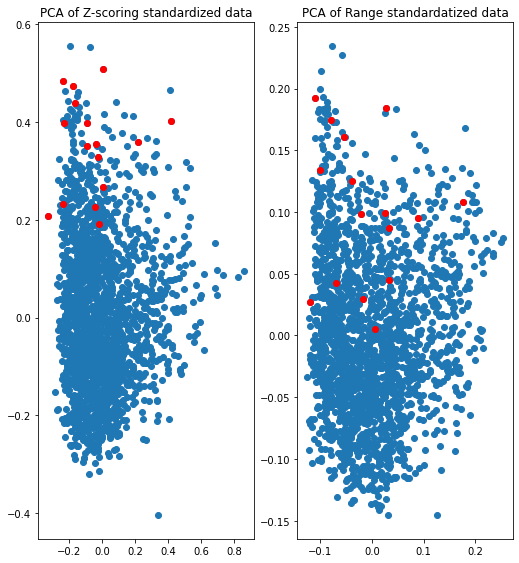

In [176]:
import matplotlib.pyplot as plt

z_z0 = z_x_zscore[:, 0]*np.sqrt(mu_x_zscore[0])
z_z1 = z_x_zscore[:, 1]*np.sqrt(mu_x_zscore[1])

z_r0 = z_x_range[:, 0]*np.sqrt(mu_x_range[0])
z_r1 = z_x_range[:, 1]*np.sqrt(mu_x_range[1])
fig = plt.figure(figsize=(8.5, 9.5))

ax = fig.add_subplot(121)
ax.scatter(z_z0, z_z1)
ax.scatter(z_z0[subset], z_z1[subset], c='r',)
plt.title("PCA of Z-scoring standardized data")

ax = fig.add_subplot(122)
ax.scatter(z_r0, z_r1)
ax.scatter(z_r0[subset], z_r1[subset], c='r',)

plt.title("PCA of Range standardatized data")
plt.show()

In [177]:
# Loadings:
c_x_zscore[:3, :]

array([[-0.22858   , -0.68286121, -0.65393925, -0.23198105],
       [-0.71369909,  0.04861478, -0.04857862,  0.69707269],
       [ 0.65382539, -0.2922794 , -0.16398401,  0.67837627]])

In [179]:
def conventional_pca(X, standardized=False):    
    # Let us name x as original data set, 
    # restricted at selected subset of features, i.e. x_selected.
    if standardized is False:
        mean_x = np.mean(X, axis=0)
        Y = np.subtract(X, mean_x)  # centered version
        B = (Y.T@Y)/Y.shape[0]  # covariance matrix of Y
        L, C = np.linalg.eig(B)  # Eigenvalues 
        sorted_idx = np.argsort(L)[::-1]  # descending order
        la1 = L[sorted_idx[0]]
        c1 = C[:, sorted_idx[0]]  # unlike np.linalg.svd now we should consider the column
        pc1 = np.divide(Y@c1, np.sqrt(Y.shape[0]*la1))  # 1st principle component    
        B_dot = B - la1*np.multiply(c1, c1.T)  # Residual of Cov.
        L_, C_ = np.linalg.eig(B_dot)
        argmax_ = np.argmax(L_)
        la2 = L_[argmax_]
        c2 = C_[:, argmax_]
        pc2 = np.divide(Y@c2, np.sqrt(Y.shape[0]*la2))  # 2nd principle component 
    else:
        Y = X
        B = (Y.T@Y)/Y.shape[0]  # covariance matrix of Y
        L, C = np.linalg.eig(B)
        sorted_idx = np.argsort(L)[::-1]  # descending order
        la1 = L[sorted_idx[0]]
        c1 = C[:, sorted_idx[0]]  # unlike np.linalg.svd now we should consider the column
        pc1 = np.divide(Y@c1, np.sqrt(Y.shape[0]*la1))  # 1st principle component    
        la2 = L[sorted_idx[1]]
        c2 = -C[:, sorted_idx[1]]  # unlike np.linalg.svd now we should consider the column
        pc2 = np.divide(Y@c2, np.sqrt(Y.shape[0]*la2))  # 2nd principle component 
    
    return pc1, pc2

In [181]:
pc1_x, pc2_x = conventional_pca(X=df_not_std, standardized=False)

In [183]:
pc1_x_z, pc2_x_z = conventional_pca(X=df_z_std, standardized=True)

In [185]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcas = pca.fit_transform(df_z_std)
pc1, pc2 = pcas[:, 0], pcas[:, 1]

c:\users\hp\pycharmprojects\pythonproject1\venv\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


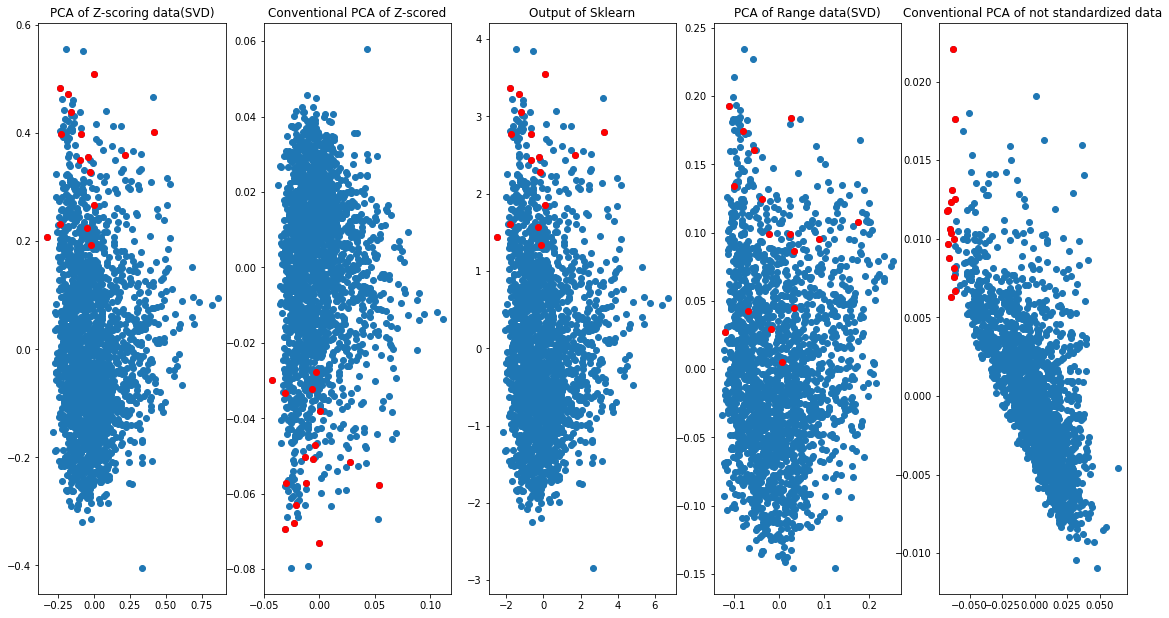

In [186]:

fig = plt.figure(figsize=(19.5, 10.5))

ax = fig.add_subplot(151)
ax.scatter(z_z0, z_z1)
ax.scatter(z_z0[subset], z_z1[subset], c='r',)
plt.title("PCA of Z-scoring data(SVD)")


ax = fig.add_subplot(152)
ax.scatter(pc1_x_z, pc2_x_z)
ax.scatter(pc1_x_z[subset], pc2_x_z[subset], c='r',)
plt.title("Conventional PCA of Z-scored")

ax = fig.add_subplot(153)
ax.scatter(pc1, pc2)
ax.scatter(pc1[subset], pc2[subset], c='r',)
plt.title("Output of Sklearn")

ax = fig.add_subplot(154)
plt.scatter(z_r0, z_r1)
ax.scatter(z_r0[subset], z_r1[subset], c='r',)
plt.title("PCA of Range data(SVD)")

ax = fig.add_subplot(155)
ax.scatter(pc1_x, pc2_x)
ax.scatter(pc1_x[subset], pc2_x[subset], c='r',)
plt.title("Conventional PCA of not standardized data")

plt.show()